In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
df = pd.read_csv('integrate.csv')

In [ ]:
df.head()

,street,ward,district,city,size,property_legal_document,bed_rooms,toilets,floors,price,house_type
0,Tôn Đức Thắng,Phường Hòa Minh,Quận Liên Chiểu,Đà Nẵng,60.8,Sổ đỏ,4.0,1.0,2.0,5 tỷ 800 triệu,nhà mặt tiền
1,Nguyễn Văn Thoại,Bắc Phú Mỹ,Quận Ngũ Hành Sơn,Đà Nẵng,110.0,Sổ đỏ,6.0,5.0,NaN,13 tỷ 300 triệu,nhà mặt tiền
2,Xuân Thiều 8,Phường Hòa Hiệp Nam,Quận Liên Chiểu,Đà Nẵng,80.0,Sổ đỏ,2.0,1.0,NaN,3 tỷ 600 triệu,nhà mặt tiền
3,Lê Duy Đình,Phường An Khê,Quận Thanh Khê,Đà Nẵng,76.0,Sổ hồng,4.0,4.0,4.0,7 tỷ 200 triệu,nhà mặt tiền
4,Lê Duẩn,Phường Tân Chính,Quận Thanh Khê,Đà Nẵng,108.3,Sổ đỏ,4.0,3.0,NaN,15 tỷ 500 triệu,nhà mặt tiền


In [ ]:
df.shape

(10604, 11)

In [ ]:
cols = ['street', 'ward', 'district', 'city', 'size', 'property_legal_document', 'bed_rooms', 'toilets', 'floors', 'house_type']
duplicate_rows = df[df.duplicated(subset=cols, keep=False)]
display(duplicate_rows.sort_values(by=cols))

,street,ward,district,city,size,property_legal_document,bed_rooms,toilets,floors,price,house_type
1928,An Cư 4,Phường An Hải Bắc,Quận Sơn Trà,Đà Nẵng,68.0,Sổ hồng,8.0,9.0,6.0,8 tỷ 300 triệu,nhà mặt tiền
1930,An Cư 4,Phường An Hải Bắc,Quận Sơn Trà,Đà Nẵng,68.0,Sổ hồng,8.0,9.0,6.0,8 tỷ 700 triệu,nhà mặt tiền
2928,An Hải 6,Phường An Hải Bắc,Quận Sơn Trà,Đà Nẵng,140.0,Sổ đỏ,4.0,4.0,NaN,5 tỷ 200 triệu,nhà mặt tiền
2965,An Hải 6,Phường An Hải Bắc,Quận Sơn Trà,Đà Nẵng,140.0,Sổ đỏ,4.0,4.0,NaN,5 tỷ 200 triệu,nhà mặt tiền
2576,An Nhơn,Phường An Hải Bắc,Quận Sơn Trà,Đà Nẵng,55.0,Sổ hồng,2.0,1.0,NaN,5 tỷ 500 triệu,nhà mặt tiền
...,...,...,...,...,...,...,...,...,...,...,...
6728,Đường Thống Nhất,Phường Bình An,Thành phố Dĩ An,Bình Dương,97.5,Đã có sổ,NaN,NaN,NaN,5000000000.0,NaN
5431,Đống Đa,Phường Thạch Thang,Quận Hải Châu,Đà Nẵng,60.0,Sổ hồng,3.0,3.0,3.0,4 tỷ 380 triệu,nhà trong ngõ
5444,Đống Đa,Phường Thạch Thang,Quận Hải Châu,Đà Nẵng,60.0,Sổ hồng,3.0,3.0,3.0,4 tỷ 380 triệu,nhà trong ngõ
75,Ỷ Lan Nguyên Phi,Phường Hòa Cường Bắc,Quận Hải Châu,Đà Nẵng,90.0,Sổ hồng,3.0,3.0,3.0,9 tỷ 200 triệu,nhà mặt tiền


In [ ]:
df = df.drop_duplicates(subset=cols)
duplicate_rows = df[df.duplicated(subset=cols, keep=False)]
display(duplicate_rows.sort_values(by=cols))

,street,ward,district,city,size,property_legal_document,bed_rooms,toilets,floors,price,house_type


# **STREET PREPROCESSING**

In [ ]:
df['street'].nunique()

3599

In [ ]:
streets = df['street'].unique().tolist()
for s in streets:
    print(s)

Tôn Đức Thắng
Nguyễn Văn Thoại
Xuân Thiều 8
Lê Duy Đình
Lê Duẩn
Võ Văn Tần
Nguyễn Thúy
Lê Ninh
An Thượng 1
Võ Nguyên Giáp
Phước Trường 1
Nguyễn Duy Hiệu
Hoàng Sa
02 Võ Văn Tần
Chế Lan Viên
Phạm Hữu Kĩnh
Nguyễn Lương Bằng
Lương Thế Vinh
Văn Tiến Dũng
Hóa Sơn 6
Trương Chí Cương
Khúc Hạo
ngô trí hoà
Lê Chân
Đinh Thị Hòa
Đa Mặn 2
An Cư 2
Nguyễn Khánh Toàn
Trần Văn Dư
An Hải 6
Phạm Kiệt
Lý Văn Tố
Đỗ Bá
Yết Kiêu
Thế Lữ
An Thượng 26
Lê Thanh Nghị
Võ An Ninh
Mai Hắc Đế
An Trung
Trịnh Lỗi
Ngô Quyền
Mỹ Đa Đông 12
Hàn Thuyên
Dương Thị Xuân Quý
Mỹ An 23
Doãn Uẩn
Mai Thúc Lân
Lê Văn Hiến
Nguyễn Thông
Bàu Tràm 1
Cô Giang
Lê Văn Quý
Đường Hà Thị Thân
Trần Minh Thiệt
Phạm Phú Tiết
Vùng Trung 18
Đoàn Khuê
Trần Khánh Dư
An Thượng 34
An Thượng 38
Chính Hữu
Núi Thành
Trần Cao Vân
Lưu Quý Kỳ
Ỷ Lan Nguyên Phi
Trần Hưng Đạo
Đinh Tiên Hoàng
Cù Chính Lan
Hóa Sơn 1
Xô Viết Nghệ Tĩnh
Lê Văn Duyệt
Đoàn Hữu Trưng
Nguyễn Đức Cảnh
Nguyễn Hoàng
Phạm Nhữ Tăng
Dương Đức Hiền
Hà Đặc
Bùi Dương Lịch
An Nhơn
Nguyễn Chí Di

In [ ]:
def process_single_row(val):
    # Chuyển về string, nếu rỗng thì trả về None để lọc sau
    text = str(val).strip()
    if not text or text.lower() == 'nan': return None
    # Cắt phần hành chính
    text = re.split(r',|(\s+(thuộc|phường|quận|xã|thành phố|tỉnh)\s+)', text, flags=re.IGNORECASE)[0]
    # Chuẩn hóa ngày (30/4 -> 30 Tháng 4)
    text = re.sub(r'\b(\d{1,2})\s*[/-]\s*(\d{1,2})\b', r'\1 Tháng \2', text)
    # Xóa tiền tố rác (Đường, Phố, Số, 01...)
    text = re.sub(r'^(Đường|Phố|Ngõ|Hẻm|Kiệt|Ngách|Khu(\s+dân\s+cư)?|KDC|Ấp|Thôn|Xóm|K|Số|Lô)\s+', '', text, flags=re.IGNORECASE)
    # Xóa đơn vị m, km cuối
    text = re.sub(r'\s+\d+(\.\d+)?(m|km)$', '', text, flags=re.IGNORECASE)
    text = text.strip()

    name_lower = text.lower()
    # Loại bỏ "không có", URL, ký tự lạ (+, -, v.v.)
    if "không có" in name_lower: return None
    if re.search(r'[/\-\(\)\.,\+]', text): return None
    if re.search(r'^(http|www|maps\.)', text, re.IGNORECASE): return None
    # Loại bỏ số đứng đầu (trừ ngày tháng)
    if re.match(r'^\d+', text) and "tháng" not in name_lower: return None
    # Loại bỏ độ dài từ không hợp lệ (lấy 2-4 từ)
    words = text.split()
    if len(words) < 2 or len(words) >= 5: return None
    # Loại bỏ lỗi dính chữ "đường" hoặc toàn số
    if "đường" in words[0].lower() or "phố" in words[0].lower(): return None
    if all(w.isdigit() for w in words): return None
    return text.title()

df['street'] = df['street'].apply(process_single_row)

# Xóa các dòng bị None
df = df.dropna(subset=['street'])
streets = sorted(df['street'].unique().tolist())
for s in streets:
    print(s)

10 Tháng 3
13 Tháng 12
19 Tháng 5
2 Tháng 9
22 Tháng 12
22 Tháng 2
26 Tháng 3
29 Tháng 3
3 Tháng 2
30 Tháng 4
A3 Quang Trung
Ama Jhao
Ama Khê
Aminia Lê Lợi
An Bình
An Cư 2
An Cư 4
An Cư 5
An Dương Vương
An Hòa 1
An Hải 10
An Hải 3
An Hải 4
An Hải 6
An Hải Đông 1
An Hội
An Mỹ
An Nhơn
An Nhơn 1
An Nhơn 7
An Nhơn Tây
An Nông
An Phú
An Phú 02
An Phú 06
An Phú 17
An Phú 26
An Phú Đông 10
An Phú Đông 25
An Phú Đông 9
An Phước
An Sơn 01
An Sơn 02
An Sơn 18
An Sơn 37
An Sơn 44
An Thượng
An Thượng 1
An Thượng 11
An Thượng 12
An Thượng 14
An Thượng 15
An Thượng 16
An Thượng 17
An Thượng 18
An Thượng 19
An Thượng 2
An Thượng 20
An Thượng 21
An Thượng 22
An Thượng 24
An Thượng 25
An Thượng 26
An Thượng 27
An Thượng 28
An Thượng 29
An Thượng 3
An Thượng 30
An Thượng 32
An Thượng 34
An Thượng 36
An Thượng 37
An Thượng 38
An Thượng 4
An Thượng 5
An Thượng 6
An Thượng 9
An Thạnh
An Thạnh 06
An Thạnh 10
An Thạnh 11
An Thạnh 19
An Thạnh 24
An Thạnh 27
An Thạnh 29
An Thạnh 38
An Thạnh 72
An Thới Đông
An 

# **WARD PREPROCESSING**

In [ ]:
df['ward'].nunique()

722

In [ ]:
wards = df['ward'].unique().tolist()
for s in wards:
    print(s)

Phường Hòa Minh
Bắc Phú Mỹ
Phường Hòa Hiệp Nam
Phường An Khê
Phường Tân Chính
Phường Chính Gián
Phường An Hải Bắc
Mỹ An
Phường Phước Mỹ
Phường An Hải Đông
Phường Thọ Quang
Phường Hòa Khánh Bắc
Phường Hòa Xuân
Phường Hòa Cường Nam
Nại Hiên Đông
Khuê Mỹ
Phường Hòa Cường Bắc
Phường An Hải Tây
Phường Mân Thái
Bắc Mỹ An
Phường Khuê Trung
Phường Phước Ninh
Hòa Quý
Hòa Hải
Phường Tam Thuận
Phường Hòa Khánh Nam
Phường Hải Châu I
Phường Hòa An
Phường Thuận Phước
Phường Bình Hiên
Phường Hòa Khê
Phường Thanh Khê Đông
Phường Thanh Khê Tây
Phường Thanh Bình
Phường Hòa Thuận Tây
Phường Vĩnh Trung
Phường Nam Dương
Phường Hải Châu II
Phường Thạc Gián
Phường Thạch Thang
Phường Bình Thuận
Phường Xuân Hà
Phường Hòa Thọ Đông
Phường Hòa Thuận Đông
Phường Hòa Phát
Phường Hải Châu
Xã Hòa Châu
Phường Hòa Hiệp Bắc
Xã Hòa Thọ
Phường Hòa Hải
Xã Hòa Bắc
Xã Hòa Phú
Xã Hòa Phước
Phường Mỹ An
Phường Khuê Mỹ
Phường Hòa Quý
Phường Hòa Thọ Tây
Phường Hoà Hiệp Nam
Phường Hoà Hải
Phường Thanh Lộc Đán
Xã Hòa Ninh
Xã Hòa P

In [ ]:
#Remove "xã", "phường" in each value of column "ward"
df['ward'] = df['ward'].str.replace(r'\b(xã|phường)\b', '', regex=True, flags=re.IGNORECASE).str.strip()

In [ ]:
#Remove nan values in column "ward"
df.dropna(subset=['ward'], inplace=True)

In [ ]:
#Remove values that have "thị trấn" (case-insensitive)
df = df[~df['ward'].str.contains('thị trấn', case=False, na=False)]

In [ ]:
df = df[~df['ward'].str.contains('không có', case=False, na=False)]

In [ ]:
#Remove (...) in the values of column "ward"
df['ward'] = df['ward'].str.replace(r'\s*\(.*?\)', '', regex=True).str.strip()

In [ ]:
#Convert I -> 1, II -> 2
df['ward'] = df['ward'].str.replace('I', '1', regex=False).str.replace('II', '2', regex=False).str.strip()

In [ ]:
# Dictionary mapping ward names without accents to the correct Vietnamese names
ward_mapping = {
    "Phu Thuong": "Phú Thượng",
    "Ngoc Lam": "Ngọc Lâm",
    "Lieu Giai": "Liễu Giai",
    "Hang Bot": "Hàng Bột",
    "O Cho Dua": "Ô Chợ Dừa",
    "Thanh Cong": "Thành Công",
    "Trung Tu": "Trung Tự",
    "Kim Lien": "Kim Liên",
    "Thanh Tri": "Thanh Trì",
    "Dong Nhan": "Đồng Nhân",
    "Phu Dien": "Phú Diễn",
    "Phuc La": "Phúc La",
    "Cua Nam": "Cửa Nam",
    "Thanh Xuan Trung": "Thanh Xuân Trung",
    "Quynh Mai": "Quỳnh Mai",
    "Tan Mai": "Tân Mai",
    "Long Bien": "Long Biên",
    "Tu Lien": "Tứ Liên",
    "Thuong Dinh": "Thượng Đình",
    "Khuong Trung": "Khương Trung",
    "Dai Kim": "Đại Kim",
    "Khuong Dinh": "Khương Đình",
    "Ngoc Ha": "Ngọc Hà",
    "Cat Linh": "Cát Linh",
    "Giang Vo": "Giảng Võ",
    "Ha Dinh": "Hạ Đình",
    "Mai Dong": "Mai Động",
    "Hang Bac": "Hàng Bạc",
    "Duong Noi": "Dương Nội",
    "My Dinh 2": "Mỹ Đình 2",
    "Yen Hoa": "Yên Hòa",
    "Kien Hung": "Kiến Hưng",
    "Nguyen Trai": "Nguyễn Trãi",
    "Phu La": "Phú La",
    "Phuong Lien": "Phương Liên",
    "Xuan Phuong": "Xuân Phương",
    "Dinh Cong": "Định Công",
    "Vinh Hung": "Vĩnh Hưng",
    "Khuong Mai": "Khương Mai",
    "Thinh Liet": "Thịnh Liệt",
    "Buoi": "Bưởi",
    "Tho Quan": "Thổ Quan",
    "Yen So": "Yên Sở",
    "Vinh Tuy": "Vĩnh Tuy",
    "Nghia Tan": "Nghĩa Tân",
    "Hoang Liet": "Hoàng Liệt",
    "Yen Nghia": "Yên Nghĩa",
    "Yen Phu": "Yên Phụ",
    "Nhan Chinh": "Nhân Chính",
    "Thach Ban": "Thạch Bàn",
    "Phuong Liet": "Phương Liệt",
    "Bach Mai": "Bạch Mai",
    "Hoang Van Thu": "Hoàng Văn Thụ",
    "Xuan Dinh": "Xuân Đỉnh",
    "Dich Vong": "Dịch Vọng",
    "Khuong Thuong": "Khương Thượng",
    "Quang An": "Quảng An",
    "Xuan Tao": "Xuân Tảo",
    "Thanh Nhan": "Thanh Nhàn",
    "Giap Bat": "Giáp Bát",
    "Dich Vong Hau": "Dịch Vọng Hậu",
    "Duc Giang": "Đức Giang",
    "Pho Hue": "Phố Huế",
    "Cong Vi": "Cống Vị",
    "Trung Liet": "Trung Liệt",
    "Van Phuc": "Vạn Phúc",
    "Truc Bach": "Trúc Bạch",
    "Vinh Phuc": "Vĩnh Phúc",
    "Gia Thuy": "Gia Thụy",
    "Bach Khoa": "Bách Khoa",
    "Giang Bien": "Giang Biên",
    "Nga Tu So": "Ngã Tư Sở",
    "Dong Ngac": "Đông Ngạc",
    "Dai Mo": "Đại Mỗ",
    "Tay Mo": "Tây Mỗ",
    "Trung Hoa": "Trung Hoà",
    "Tuong Mai": "Tương Mai",
    "La Khe": "La Khê",
    "Minh Khai": "Minh Khai",
    "Mo Lao": "Mỗ Lao",
    "Le Dai Hanh": "Lê Đại Hành",
    "Nghia Do": "Nghĩa Đô",
    "Duc Thang": "Đức Thắng",
    "Quynh Loi": "Quỳnh Lôi",
    "Bach Dang": "Bạch Đằng",
    "Ha Cau": "Hà Cầu",
    "Thuy Khue": "Thụy Khuê",
    "Phuc Dien": "Phúc Diễn",
    "Phu Luong": "Phú Lương",
    "Thanh Luong": "Thanh Lương",
    "Viet Hung": "Việt Hưng",
    "Hang Ma": "Hàng Mã",
    "Quan Hoa": "Quan Hoa",
    "Bo De": "Bồ Đề",
    "Kham Thien": "Khâm Thiên",
    "Lang Ha": "Láng Hạ",
    "Lien Mac": "Liên Mạc",
    "Phuc Tan": "Phúc Tân",
    "Me Tri": "Mễ Trì",
    "Kim Ma": "Kim Mã",
    "Thinh Quang": "Thịnh Quang",
    "Doi Can": "Đội Cấn",
    "Cau Den": "Cầu Dền",
    "Tran Hung Dao": "Trần Hưng Đạo",
    "Mai Dich": "Mai Dịch",
    "Cau Dien": "Cầu Diễn",
    "Phuc Loi": "Phúc Lợi",
    "Linh Nam": "Lĩnh Nam",
    "Phuc Xa": "Phúc Xá",
    "Phu Do": "Phú Đô",
    "Nguyen Trung Truc": "Nguyễn Trung Trực",
    "Ngoc Thuy": "Ngọc Thụy",
    "Dong Xuan": "Đồng Xuân",
    "Co Nhue 1": "Cổ Nhuế 1",
    "Lang Thuong": "Láng Thượng",
    "Sai Dong": "Sài Đồng",
    "Dien Bien": "Điện Biên",
    "Van Mieu": "Văn Miếu",
    "Ngoc Khanh": "Ngọc Khánh",
    "Van Quan": "Văn Quán",
    "Co Nhue 2": "Cổ Nhuế 2",
    "Quoc Tu Giam": "Quốc Tử Giám",
    "Thanh Xuan Bac": "Thanh Xuân Bắc",
    "Hang Dao": "Hàng Đào",
    "Hang Bai": "Hàng Bài",
    "Truong Dinh": "Trương Định",
    "Hang Bong": "Hàng Bông",
    "Hang Buom": "Hàng Buồm",
    "Nhat Tan": "Nhật Tân",
    "Thuong Thanh": "Thượng Thanh",
    "Trung Phung": "Trung Phụng",
    "Pham Dinh Ho": "Phạm Đình Hổ",
    "Hang Gai": "Hàng Gai",
    "Dong Mac": "Đống Mác",
    "Hang Bo": "Hàng Bồ",
    "Cua Dong": "Cửa Đông",
    "My Dinh 1": "Mỹ Đình 1",
    "Trung Van": "Trung Văn",
    "Nguyen Du": "Nguyễn Du",
    "Yet Kieu": "Yết Kiêu",
    "Chuong Duong": "Chương Dương",
    "Thuy Phuong": "Thụy Phương",
    "Van Chuong": "Văn Chương",
    "Thuong Cat": "Thượng Cát",
    "Phuc Dong": "Phúc Đồng",
    "Phan Chu Trinh": "Phan Chu Trinh",
    "Xuan La": "Xuân La",
    "Cu Khoi": "Cự Khối",
    "Dong Tam": "Đồng Tâm",
    "Tran Phu": "Trần Phú",
    "Bien Giang": "Biên Giang",
    "Trang Tien": "Tràng Tiền",
    "Quan Thanh": "Quán Thánh",
    "Thanh Xuan Nam": "Thanh Xuân Nam",
    "Phuong Canh": "Phương Canh",
    "Tay Tuu": "Tây Tựu",
    "Phuong Mai": "Phương Mai",
    "Phu Lam": "Phú Lâm",
    "Hang Trong": "Hàng Trống",
    "Ly Thai To": "Lý Thái Tổ",
    "Kim Giang": "Kim Giang",
    "Dong Mai": "Đông Mai"
}
def normalize_ward(name):
    return ward_mapping.get(name, name)

ward_list = [
    "Phu Thuong",
    "Ngoc Lam",
    "Lieu Giai",
    "Hang Bot",
    "O Cho Dua",
    "Thanh Cong",
    "Trung Tu",
    "Kim Lien",
    "Thanh Tri",
    "Dong Nhan",
    "Phu Dien",
    "Phuc La",
    "Cua Nam",
    "Thanh Xuan Trung",
    "Quynh Mai",
    "Tan Mai",
    "Long Bien",
    "Tu Lien",
    "Thuong Dinh",
    "Khuong Trung",
    "Dai Kim",
    "Khuong Dinh",
    "Ngoc Ha",
    "Cat Linh",
    "Giang Vo",
    "Ha Dinh",
    "Mai Dong",
    "Hang Bac",
    "Duong Noi",
    "My Dinh 2",
    "Yen Hoa",
    "Kien Hung",
    "Nguyen Trai",
    "Phu La",
    "Phuong Lien",
    "Xuan Phuong",
    "Dinh Cong",
    "Vinh Hung",
    "Khuong Mai",
    "Thinh Liet",
    "Buoi",
    "Tho Quan",
    "Yen So",
    "Vinh Tuy",
    "Nghia Tan",
    "Hoang Liet",
    "Yen Nghia",
    "Yen Phu",
    "Nhan Chinh",
    "Thach Ban",
    "Phuong Liet",
    "Bach Mai",
    "Hoang Van Thu",
    "Xuan Dinh",
    "Dich Vong",
    "Khuong Thuong",
    "Quang An",
    "Xuan Tao",
    "Thanh Nhan",
    "Giap Bat",
    "Dich Vong Hau",
    "Duc Giang",
    "Pho Hue",
    "Cong Vi",
    "Trung Liet",
    "Van Phuc",
    "Truc Bach",
    "Vinh Phuc",
    "Gia Thuy",
    "Bach Khoa",
    "Giang Bien",
    "Nga Tu So",
    "Dong Ngac",
    "Dai Mo",
    "Tay Mo",
    "Trung Hoa",
    "Tuong Mai",
    "La Khe",
    "Minh Khai",
    "Mo Lao",
    "Le Dai Hanh",
    "Nghia Do",
    "Duc Thang",
    "Quynh Loi",
    "Bach Dang",
    "Ha Cau",
    "Thuy Khue",
    "Phuc Dien",
    "Phu Luong",
    "Thanh Luong",
    "Viet Hung",
    "Hang Ma",
    "Quan Hoa",
    "Bo De",
    "Kham Thien",
    "Lang Ha",
    "Lien Mac",
    "Phuc Tan",
    "Me Tri",
    "Kim Ma",
    "Thinh Quang",
    "Doi Can",
    "Cau Den",
    "Tran Hung Dao",
    "Mai Dich",
    "Cau Dien",
    "Phuc Loi",
    "Linh Nam",
    "Phuc Xa",
    "Phu Do",
    "Nguyen Trung Truc",
    "Ngoc Thuy",
    "Dong Xuan",
    "Co Nhue 1",
    "Lang Thuong",
    "Sai Dong",
    "Dien Bien",
    "Van Mieu",
    "Ngoc Khanh",
    "Van Quan",
    "Co Nhue 2",
    "Quoc Tu Giam",
    "Thanh Xuan Bac",
    "Hang Dao",
    "Hang Bai",
    "Truong Dinh",
    "Hang Bong",
    "Hang Buom",
    "Nhat Tan",
    "Thuong Thanh",
    "Trung Phung",
    "Pham Dinh Ho",
    "Hang Gai",
    "Dong Mac",
    "Hang Bo",
    "Cua Dong",
    "My Dinh 1",
    "Trung Van",
    "Nguyen Du",
    "Yet Kieu",
    "Chuong Duong",
    "Thuy Phuong",
    "Van Chuong",
    "Thuong Cat",
    "Phuc Dong",
    "Phan Chu Trinh",
    "Xuan La",
    "Cu Khoi",
    "Dong Tam",
    "Tran Phu",
    "Bien Giang",
    "Trang Tien",
    "Quan Thanh",
    "Thanh Xuan Nam",
    "Phuong Canh",
    "Tay Tuu",
    "Phuong Mai",
    "Phu Lam",
    "Hang Trong",
    "Ly Thai To",
    "Kim Giang",
    "Dong Mai"
]
normalized = [normalize_ward(w) for w in ward_list]
df['ward'] = df['ward'].apply(normalize_ward)

In [ ]:
wards = sorted(df['ward'].unique().tolist())
for s in wards:
    print(s)

1
10
11
12
13
14
15
16
17
18
19
2
21
22
24
25
26
28
3
4
5
6
7
8
9
An Bình
An Cư
An Hoà
An Hòa
An Hóa
An Hải Bắc
An Hải Tây
An Hải Đông
An Hảo
An Hội
An Khánh
An Khê
An Khương
An Long
An Lạc
An Lạc A
An Lập
An Lộc
An Nghiệp
An Ngãi
An Nhơn Tây
An Nhứt
An Phú
An Phú Tây
An Phú Đông
An Phước
An Sơn
An Thái
An Thạnh
An Thạnh Trung
An Thới
An Thới Đông
An Tây
An Viễn
An Điền
An Định
Ba Láng
Bà Điểm
Bàu Hàm
Bàu Hàm 2
Bàu Sen
Bàu Trâm
Bình An
Bình Chiểu
Bình Chuẩn
Bình Chánh
Bình Châu
Bình Giã
Bình Hiên
Bình Hòa
Bình Hưng
Bình Hưng Hoà A
Bình Hưng Hoà B
Bình Hưng Hòa
Bình Khánh
Bình Lộc
Bình Lợi
Bình Minh
Bình Mỹ
Bình Nhâm
Bình Phú
Bình Sơn
Bình Thuận
Bình Thạnh
Bình Thắng
Bình Thọ
Bình Thủy
Bình Trung
Bình Trưng Tây
Bình Trưng Đông
Bình Trị Đông
Bình Trị Đông A
Bình Trị Đông B
Bình Đa
Bình Định
Bình Đức
Bông Trang
Bùi Hữu Nghĩa
Bùi Thị Xuân
Băng A Drênh
Bưng Riềng
Bảo Quang
Bảo Vinh
Bắc Mỹ An
Bắc Phú Mỹ
Bắc Sơn
Bến Nghé
Bến Thành
Bồng Sơn
Bửu Hòa
Bửu Long
Chánh Mỹ
Chánh Nghĩa
Châu Pha
Châu P

# **DISTRICT PREPROCESSING**

In [ ]:
df['district'].nunique()

131

In [ ]:
df['district'].unique()

array(['Quận Liên Chiểu', 'Quận Ngũ Hành Sơn', 'Quận Thanh Khê',
       'Quận Sơn Trà', 'Quận Cẩm Lệ', 'Quận Hải Châu', 'Huyện Hoà Vang',
       'Quận Ninh Kiều', 'Quận Cái Răng', 'Quận Bình Thuỷ',
       'Huyện Thới Lai', 'Huyện Phong Điền', 'Quận Ô Môn',
       'Thành phố Dĩ An', 'Quận 10', 'Thành phố Phan Thiết',
       'Huyện Bình Chánh', 'Quận Bình Tân', 'Huyện Phú Giáo', 'Quận 12',
       'Quận 7', 'Huyện Dầu Tiếng', 'Huyện Xuyên Mộc', 'Thành phố Bà Rịa',
       'Huyện Định Quán', 'Huyện Đất Đỏ', 'Quận 4', 'Thị Xã Buôn Hồ',
       'Thành phố Biên Hòa', 'Thành phố Thủ Đức', 'Huyện Củ Chi',
       'Huyện Hóc Môn', 'Thành phố Qui Nhơn', 'Quận Tân Phú',
       'Huyện Long Thành', 'Huyện Nhà Bè', 'Thị xã Phú Mỹ',
       'Thành phố Thuận An', 'Thị xã Bến Cát', 'Huyện Hàm Thuận Bắc',
       'Huyện Nhơn Trạch', 'Quận 6', "Huyện Cư M'gar", 'Quận 1',
       'Quận Tân Bình', 'Thành phố Long Khánh', 'Thành phố Thủ Dầu Một',
       'Huyện Trảng Bom', 'Huyện Thống Nhất', 'Huyện Đồng Phú',
    

In [ ]:
df['district'] = df['district'].str.replace(r'\b(quận|huyện)\b', '', regex=True, flags=re.IGNORECASE).str.strip()

In [ ]:
#Remove values that have "thị xã" (case-insensitive)
df = df[~df['district'].str.contains('thị xã', case=False, na=False)]

In [ ]:
#Remove values that have "thành phố" (case-insensitive)
df = df[~df['district'].str.contains('thành phố', case=False, na=False)]

In [ ]:
df['district'].unique()

array(['Liên Chiểu', 'Ngũ Hành Sơn', 'Thanh Khê', 'Sơn Trà', 'Cẩm Lệ',
       'Hải Châu', 'Hoà Vang', 'Ninh Kiều', 'Cái Răng', 'Bình Thuỷ',
       'Thới Lai', 'Phong Điền', 'Ô Môn', '10', 'Bình Chánh', 'Bình Tân',
       'Phú Giáo', '12', '7', 'Dầu Tiếng', 'Xuyên Mộc', 'Định Quán',
       'Đất Đỏ', '4', 'Củ Chi', 'Hóc Môn', 'Tân Phú', 'Long Thành',
       'Nhà Bè', 'Hàm Thuận Bắc', 'Nhơn Trạch', '6', "Cư M'gar", '1',
       'Tân Bình', 'Trảng Bom', 'Thống Nhất', 'Đồng Phú', 'Phú Nhuận',
       'Châu Thành', '8', 'Gò Vấp', 'Bình Thạnh', 'Cư Kuin', '5',
       'Vĩnh Cửu', '11', '3', 'Chơn Thành', 'Lộc Ninh', 'Long Điền',
       'Cẩm Mỹ', 'Hàm Thuận Nam', 'Xuân Lộc', 'Tuy Phong', 'Bắc Bình',
       'Phú Riềng', 'Cần Giờ', 'Buôn Đôn', 'Tuy Phước', 'Hàm Tân',
       'Bắc Tân Uyên', 'Đắk Mil', 'Phù Cát', 'Ea Kar', 'Đăk Glong',
       'Châu Đức', 'Chợ Mới', 'Bình Đại', 'Bù Đăng', 'Hớn Quản',
       'Châu Phú', 'Krông A Na', 'Cái Nước', 'Yên Thế', 'Chợ Lách',
       'Krông Bông', 'Krông Búk', 

# **CITY PREPROCESSING**

In [ ]:
df['city'].unique()

array(['Đà Nẵng', 'Cần Thơ', 'Tp Hồ Chí Minh', 'Bình Dương',
       'Bà Rịa - Vũng Tàu', 'Đồng Nai', 'Bình Thuận', 'Đắk Lắk',
       'Bình Phước', 'Bến Tre', 'Bình Định', 'Đắk Nông', 'An Giang',
       'Cà Mau', 'Bắc Giang', 'Long An'], dtype=object)

In [ ]:
df['city'] = df['city'].str.replace('Tp', '', regex=False).str.strip()

In [ ]:
df['city'].unique()

array(['Đà Nẵng', 'Cần Thơ', 'Hồ Chí Minh', 'Bình Dương',
       'Bà Rịa - Vũng Tàu', 'Đồng Nai', 'Bình Thuận', 'Đắk Lắk',
       'Bình Phước', 'Bến Tre', 'Bình Định', 'Đắk Nông', 'An Giang',
       'Cà Mau', 'Bắc Giang', 'Long An'], dtype=object)

# **SIZE PREPROCESSING**

In [ ]:
sizes = df['size'].unique().tolist()
for s in sizes:
    print(s)

60.8
110.0
80.0
76.0
108.3
70.0
85.5
88.7
140.0
90.0
156.9
102.0
143.0
87.0
60.0
57.0
379.0
nan
100.0
66.0
54.0
91.0
72.0
98.0
96.0
74.0
56.0
92.0
86.0
125.0
120.0
180.0
94.0
58.0
95.0
150.0
256.0
88.0
138.0
112.0
122.0
82.0
146.3
75.0
111.0
97.0
103.0
905.0
132.0
100.2
52.0
60.7
202.0
250.0
198.0
18.54
7167.0
73.0
63.0
92651.8
77.7
114.0
160.0
89.0
44.0
189.0
105.0
51.0
40.0
109.0
50.0
388.0
77.0
248.0
113.0
155.0
245.0
300.0
175.0
108.0
350.0
156.0
81.0
145.0
618.0
170.0
1576.0
200.0
106.0
101.0
165.0
260.0
148.0
154.0
144.0
1135.0
228.0
210.0
215.0
162.0
474.0
280.0
118.0
133.0
83.0
282.0
55.0
225.0
171.0
147.0
257.0
321.0
115.0
7320.0
395.0
320.0
625.0
166.0
135.0
164.0
85.0
195.0
185.0
450.0
177.0
128.0
192.0
93.0
246.0
291.0
785.0
184.0
226.0
500.0
234.0
213.0
137.0
117.0
157.0
240.0
214.0
688.0
252.0
188.0
1500.0
438.0
64.0
67.0
232.0
243.0
99.0
119.0
107.0
84.0
65.0
62.0
238.0
675.0
325.0
127.0
45.0
44.4
43.0
78.0
121.0
220.0
208.0
149.0
68.0
79.0
130.0
227.0
34.0
186.0
230.0
4

In [ ]:
# df['size'] = df['size'].astype(str).str.replace('m²', '', regex=False).str.strip()
# df['size'] = pd.to_numeric(df['size'], errors='coerce')
# df.shape

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7994 entries, 0 to 10603
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   street                   7994 non-null   object 
 1   ward                     7994 non-null   object 
 2   district                 7994 non-null   object 
 3   city                     7994 non-null   object 
 4   size                     7992 non-null   float64
 5   property_legal_document  7992 non-null   object 
 6   bed_rooms                6856 non-null   float64
 7   toilets                  6568 non-null   float64
 8   floors                   4444 non-null   float64
 9   price                    7994 non-null   object 
 10  house_type               7342 non-null   object 
dtypes: float64(4), object(7)
memory usage: 749.4+ KB


In [ ]:
df.dropna(subset=['size'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7992 entries, 0 to 10603
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   street                   7992 non-null   object 
 1   ward                     7992 non-null   object 
 2   district                 7992 non-null   object 
 3   city                     7992 non-null   object 
 4   size                     7992 non-null   float64
 5   property_legal_document  7990 non-null   object 
 6   bed_rooms                6856 non-null   float64
 7   toilets                  6568 non-null   float64
 8   floors                   4442 non-null   float64
 9   price                    7992 non-null   object 
 10  house_type               7340 non-null   object 
dtypes: float64(4), object(7)
memory usage: 749.2+ KB


# **PRICE PREPROCESSING**

In [ ]:
prices = df['price'].unique().tolist()
for s in prices:
    print(s)

5 tỷ 800 triệu
13 tỷ 300 triệu
3 tỷ 600 triệu
7 tỷ 200 triệu
15 tỷ 500 triệu
33 tỷ
7 tỷ 150 triệu
17 tỷ 900 triệu
25 tỷ
40 tỷ
17 tỷ 500 triệu
26 tỷ 200 triệu
20 tỷ
45 tỷ
6 tỷ 700 triệu
4 tỷ 900 triệu
4 tỷ 850 triệu
11 tỷ 200 triệu
4 tỷ
11 tỷ 500 triệu
4 tỷ 800 triệu
6 tỷ 550 triệu
3 tỷ 900 triệu
5 tỷ 550 triệu
13 tỷ 500 triệu
4 tỷ 250 triệu
4 tỷ 990 triệu
9 tỷ 399 triệu
5 tỷ
5 tỷ 100 triệu
9 tỷ
14 tỷ 500 triệu
18 tỷ
5 tỷ 250 triệu
6 tỷ 300 triệu
11 tỷ 900 triệu
12 tỷ
6 tỷ 600 triệu
3 tỷ 950 triệu
8 tỷ 200 triệu
10 tỷ 199 triệu
21 tỷ 500 triệu
10 tỷ 499 triệu
10 tỷ 299 triệu
5 tỷ 199 triệu
5 tỷ 300 triệu
19 tỷ 999 triệu
7 tỷ 899 triệu
9 tỷ 999 triệu
6 tỷ 589 triệu
3 tỷ 608 triệu
19 tỷ 500 triệu
10 tỷ 800 triệu
16 tỷ 500 triệu
4 tỷ 100 triệu
6 tỷ 150 triệu
3 tỷ 700 triệu
7 tỷ 800 triệu
8 tỷ 800 triệu
17 tỷ
7 tỷ 500 triệu
9 tỷ 899 triệu
13 tỷ 600 triệu
4 tỷ 950 triệu
5 triệu 800 nghìn
9 tỷ 200 triệu
80 tỷ
3 tỷ 800 triệu
12 tỷ 500 triệu
11 tỷ 599 triệu
1 tỷ 93 triệu
4 tỷ 300 triệu
30 triệu

In [ ]:
def parse_vietnamese_price(price):
    # Case 1: numeric (int, float)
    if isinstance(price, (int, float)):
        return float(price)

    # Case 2: numeric string → keep
    if isinstance(price, str):
        stripped = price.strip()
        if re.fullmatch(r'\d+(\.\d+)?', stripped):
            return float(stripped)

    if pd.isna(price) or not isinstance(price, str):
        return None

    price_str = price.lower().replace('.', '').replace(',', '').strip()

    # Only parse Vietnamese units
    if 'tỷ' not in price_str and 'triệu' not in price_str:
        return None

    # Parse "tỷ"
    ty_match = re.search(
        r'(\d+(?:\s*\d+)?)\s*tỷ(?:\s*(\d+(?:\s*\d+)?)\s*triệu)?',
        price_str
    )
    if ty_match:
        ty = float(ty_match.group(1).replace(' ', '')) * 1_000_000_000
        trieu = float((ty_match.group(2) or '0').replace(' ', '')) * 1_000_000
        return ty + trieu

    # Parse "triệu"
    trieu_match = re.search(r'(\d+(?:\s*\d+)?)\s*triệu', price_str)
    if trieu_match:
        return float(trieu_match.group(1).replace(' ', '')) * 1_000_000

    return None

df['price'] = df['price'].apply(parse_vietnamese_price)
prices = df['price'].unique().tolist()
for s in prices:
    print(s)

5800000000.0
13300000000.0
3600000000.0
7200000000.0
15500000000.0
33000000000.0
7150000000.0
17900000000.0
25000000000.0
40000000000.0
17500000000.0
26200000000.0
20000000000.0
45000000000.0
6700000000.0
4900000000.0
4850000000.0
11200000000.0
4000000000.0
11500000000.0
4800000000.0
6550000000.0
3900000000.0
5550000000.0
13500000000.0
4250000000.0
4990000000.0
9399000000.0
5000000000.0
5100000000.0
9000000000.0
14500000000.0
18000000000.0
5250000000.0
6300000000.0
11900000000.0
12000000000.0
6600000000.0
3950000000.0
8200000000.0
10199000000.0
21500000000.0
10499000000.0
10299000000.0
5199000000.0
5300000000.0
19999000000.0
7899000000.0
9999000000.0
6589000000.0
3608000000.0
19500000000.0
10800000000.0
16500000000.0
4100000000.0
6150000000.0
3700000000.0
7800000000.0
8800000000.0
17000000000.0
7500000000.0
9899000000.0
13600000000.0
4950000000.0
5000000.0
9200000000.0
80000000000.0
3800000000.0
12500000000.0
11599000000.0
1093000000.0
4300000000.0
30000000.0
4700000000.0
4299000000.0


In [ ]:
df.dropna(subset=['price'], inplace=True)

In [ ]:
df['price'] = df['price'] / 1e9

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7986 entries, 0 to 10603
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   street                   7986 non-null   object 
 1   ward                     7986 non-null   object 
 2   district                 7986 non-null   object 
 3   city                     7986 non-null   object 
 4   size                     7986 non-null   float64
 5   property_legal_document  7984 non-null   object 
 6   bed_rooms                6850 non-null   float64
 7   toilets                  6562 non-null   float64
 8   floors                   4438 non-null   float64
 9   price                    7986 non-null   float64
 10  house_type               7334 non-null   object 
dtypes: float64(5), object(6)
memory usage: 748.7+ KB


# **PROPERTY_LEGAL_DOCUMENT PREPROCESSING**

In [ ]:
df['property_legal_document'].unique()

array(['Sổ đỏ', 'Sổ hồng', 'Hợp đồng mua bán', 'Giấy tờ hợp lệ',
       'Không xác định', 'Đã có sổ', 'Sổ chung / công chứng vi bằng',
       'Sổ hồng riêng', '1', nan, 'Đang chờ sổ', 'Giấy tờ viết tay',
       'Không có sổ', 'Hợp đồng đặt cọc', 'Giấy tờ khác'], dtype=object)

In [ ]:
df.dropna(subset=['property_legal_document'], inplace=True)

In [ ]:
mapping_legal = {
    'Sổ đỏ': 1,
    'Sổ hồng': 1,
    'Đã có sổ': 1,
    '1': 1,
    'Sổ hồng riêng': 1,
    'Hợp đồng mua bán': 2,
    'Đang chờ sổ': 3,
    'Sổ chung / công chứng vi bằng': 4,
    'Hợp đồng đặt cọc': 5,
    'Giấy tờ viết tay': 6,
    'Giấy tờ hợp lệ': 7,
    'Giấy tờ khác': 7,
    'Không có sổ': 8,
    'Không xác định': 9,
    np.nan: 9,
}

df['property_legal_document'] = df['property_legal_document'].map(mapping_legal)

df['property_legal_document'].unique()

array([1, 2, 7, 9, 4, 3, 6, 8, 5])

# **HOUSE_TYPE PREPROCESSING**

In [ ]:
df['house_type'].unique()

array(['nhà mặt tiền', 'nhà biệt thự', 'nhà trong ngõ', 'Nhà ngõ, hẻm',
       'Nhà mặt phố, mặt tiền', nan, 'Nhà biệt thự', 'Nhà phố liền kề'],
      dtype=object)

In [ ]:
df['house_type'] = df['house_type'].str.lower().str.strip()
df['house_type'] = df['house_type'].replace({
    'nhà mặt tiền': 1,
    'nhà biệt thự': 2,
    'nhà trong ngõ': 3,
    'nhà ngõ, hẻm': 3,
    'nhà mặt phố, mặt tiền': 1,
    'nhà phố liền kề': 4
})
df['house_type'].unique()

/tmp/ipython-input-4069445694.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['house_type'] = df['house_type'].replace({


array([ 1.,  2.,  3., nan,  4.])

In [ ]:
df.dropna(subset=['house_type'], inplace=True)

In [ ]:
df['house_type'] = df['house_type'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7333 entries, 0 to 10602
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   street                   7333 non-null   object 
 1   ward                     7333 non-null   object 
 2   district                 7333 non-null   object 
 3   city                     7333 non-null   object 
 4   size                     7333 non-null   float64
 5   property_legal_document  7333 non-null   int64  
 6   bed_rooms                6700 non-null   float64
 7   toilets                  6427 non-null   float64
 8   floors                   4438 non-null   float64
 9   price                    7333 non-null   float64
 10  house_type               7333 non-null   int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 687.5+ KB


# **FLOORS, BED_ROOMS, TOILETS PREPROCESSING**

In [ ]:
df['floors'].unique()

array([ 2. ,  nan,  4. ,  5. ,  3. ,  6. ,  7. ,  8. ,  4.5,  9. , 10. ,
       11. ,  3.5, 13. ,  2.5,  5.5, 26. ,  6.5,  1. ,  2.3,  2.4, 18. ,
       12. , 28. , 20. ,  1.5, 22. ,  2.2, 29. , 14. , 31. , 15. , 23. ,
       19. , 34. , 24. , 33. ])

In [ ]:
df = df[~df['floors'].isin([3.5, 4.5, 2.5, 5.5, 6.5, 2.3, 2.4, 1.5, 2.2])]

In [ ]:
df['floors'].unique()

array([ 2., nan,  4.,  5.,  3.,  6.,  7.,  8.,  9., 10., 11., 13., 26.,
        1., 18., 12., 28., 20., 22., 29., 14., 31., 15., 23., 19., 34.,
       24., 33.])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7120 entries, 0 to 10602
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   street                   7120 non-null   object 
 1   ward                     7120 non-null   object 
 2   district                 7120 non-null   object 
 3   city                     7120 non-null   object 
 4   size                     7120 non-null   float64
 5   property_legal_document  7120 non-null   int64  
 6   bed_rooms                6516 non-null   float64
 7   toilets                  6243 non-null   float64
 8   floors                   4225 non-null   float64
 9   price                    7120 non-null   float64
 10  house_type               7120 non-null   int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 667.5+ KB


In [ ]:
from sklearn.impute import KNNImputer

features = ['size', 'price', 'bed_rooms', 'toilets', 'floors']
imputer = KNNImputer(n_neighbors=30, weights='distance')

df[features] = imputer.fit_transform(df[features])
df[['bed_rooms','toilets','floors']] = df[['bed_rooms','toilets','floors']].round().astype(int)

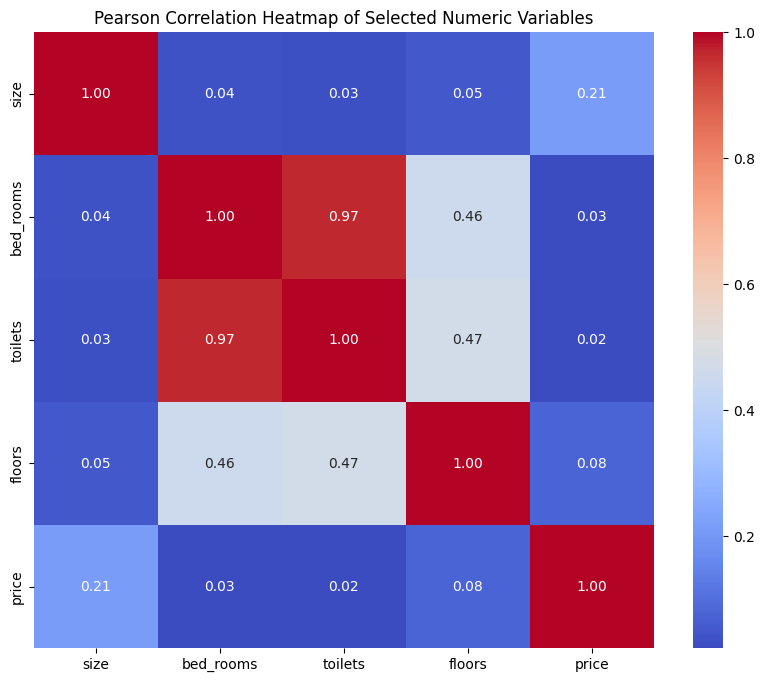

In [ ]:
numeric_cols = ['size', 'bed_rooms', 'toilets', 'floors', 'price']
correlation_matrix = df[numeric_cols].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap of Selected Numeric Variables')
plt.show()

In [ ]:
df.to_csv('preprocessed_integrate.csv', index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7120 entries, 0 to 10602
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   street                   7120 non-null   object 
 1   ward                     7120 non-null   object 
 2   district                 7120 non-null   object 
 3   city                     7120 non-null   object 
 4   size                     7120 non-null   float64
 5   property_legal_document  7120 non-null   int64  
 6   bed_rooms                7120 non-null   int64  
 7   toilets                  7120 non-null   int64  
 8   floors                   7120 non-null   int64  
 9   price                    7120 non-null   float64
 10  house_type               7120 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 667.5+ KB
